In [ ]:
# some imports 
import jax
import jax.numpy as jnp
import numpy as np
from qsc.qsc_method import calculate
import timeit


In [54]:
# speed results for calculate portion of code

#get inputs from file storing some inputs calculated in the original qsc
data = np.load('values.npy', allow_pickle=True).item()

#jit the function 
jitted_function = jax.jit(calculate, static_argnames=['order', 'nphi'])

#warm it up
r1_results, r2_results, r3_results = jitted_function(jnp.asarray(data['nfp']), jnp.asarray(data['etabar']), jnp.asarray(data['curvature']), jnp.asarray(data['sigma']), jnp.asarray(data['helicity']), jnp.asarray(data['varphi']), jnp.asarray(data['X1s']), jnp.asarray(data['X1c']), jnp.asarray(data['d_l_d_phi']), jnp.asarray(data['d_d_varphi']), jnp.asarray(data['sG']), jnp.asarray(data['spsi']), jnp.asarray(data['B0']), jnp.asarray(data['G0']), jnp.asarray(data['iotaN']), jnp.asarray(data['torsion']), jnp.asarray(data['abs_G0_over_B0']), jnp.asarray(data['B2s']), jnp.asarray(data['B2c']), jnp.asarray(data['p2']), jnp.asarray(data['I2']), data['nphi'], 'r3', jnp.asarray(data['iota']), jnp.asarray(data['d_l_d_varphi']), jnp.asarray(data['tangent_cylindrical']), jnp.asarray(data['normal_cylindrical']), jnp.asarray(data['binormal_cylindrical']), jnp.asarray(data['d_phi']), jnp.asarray(data['axis_length']))

#define lambda
jax_lambda = lambda: jitted_function(
    jnp.asarray(data['nfp']), jnp.asarray(data['etabar']), jnp.asarray(data['curvature']), jnp.asarray(data['sigma']), jnp.asarray(data['helicity']), jnp.asarray(data['varphi']), jnp.asarray(data['X1s']), jnp.asarray(data['X1c']), jnp.asarray(data['d_l_d_phi']), jnp.asarray(data['d_d_varphi']), jnp.asarray(data['sG']), jnp.asarray(data['spsi']), jnp.asarray(data['B0']), jnp.asarray(data['G0']), jnp.asarray(data['iotaN']), jnp.asarray(data['torsion']), jnp.asarray(data['abs_G0_over_B0']), jnp.asarray(data['B2s']), jnp.asarray(data['B2c']), jnp.asarray(data['p2']), jnp.asarray(data['I2']), data['nphi'], 'r3', jnp.asarray(data['iota']), jnp.asarray(data['d_l_d_varphi']), jnp.asarray(data['tangent_cylindrical']), jnp.asarray(data['normal_cylindrical']), jnp.asarray(data['binormal_cylindrical']), jnp.asarray(data['d_phi']), jnp.asarray(data['axis_length'])
)

non_jax_lambda = lambda: calculate(
    jnp.asarray(data['nfp']), jnp.asarray(data['etabar']), jnp.asarray(data['curvature']), jnp.asarray(data['sigma']), jnp.asarray(data['helicity']), jnp.asarray(data['varphi']), jnp.asarray(data['X1s']), jnp.asarray(data['X1c']), jnp.asarray(data['d_l_d_phi']), jnp.asarray(data['d_d_varphi']), jnp.asarray(data['sG']), jnp.asarray(data['spsi']), jnp.asarray(data['B0']), jnp.asarray(data['G0']), jnp.asarray(data['iotaN']), jnp.asarray(data['torsion']), jnp.asarray(data['abs_G0_over_B0']), jnp.asarray(data['B2s']), jnp.asarray(data['B2c']), jnp.asarray(data['p2']), jnp.asarray(data['I2']), data['nphi'], 'r3', jnp.asarray(data['iota']), jnp.asarray(data['d_l_d_varphi']), jnp.asarray(data['tangent_cylindrical']), jnp.asarray(data['normal_cylindrical']), jnp.asarray(data['binormal_cylindrical']), jnp.asarray(data['d_phi']), jnp.asarray(data['axis_length'])
)

n_runs = 10

In [38]:
timeit.timeit(jax_lambda, number=10000)

11.24364246299956

In [70]:
#run tests 
jax_times = [timeit.timeit(jax_lambda, number=i) for i in range(n_runs)]

non_jax_times = [timeit.timeit(non_jax_lambda, number=i) for i in range(n_runs)]

print(jax_times)



Calculating R1...

Calculating R2...

Calculating R3...

Calculating R1...

Calculating R2...

Calculating R3...

Calculating R1...


KeyboardInterrupt: 

In [63]:
#run tests 
jax_times = [timeit.timeit(jax_lambda, number=i) for i in range(3)]

non_jax_times = [timeit.timeit(non_jax_lambda, number=i) for i in range(3)]


Calculating R1...

Calculating R2...

Calculating R3...

Calculating R1...

Calculating R2...

Calculating R3...

Calculating R1...

Calculating R2...

Calculating R3...


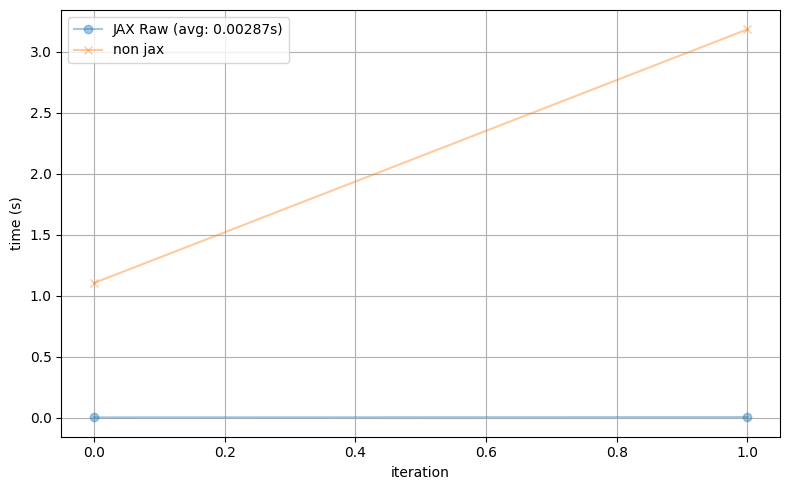

In [68]:
import matplotlib.pyplot as plt
import numpy as np

jax_avg = np.mean(jax_times)

def moving_avg(data, windowsize=2):
    return np.convolve(data, np.ones(windowsize)/windowsize, mode='valid')

moving_avg_times_jax = moving_avg(jax_times)
moving_avg_times_non_jax = moving_avg(non_jax_times)

plt.figure(figsize=(8,5))
plt.plot(moving_avg_times_jax, label = f"JAX Raw (avg: {jax_avg:.5f}s)" , marker = 'o', alpha = .4)
plt.plot(moving_avg_times_non_jax, label = f"non jax" , marker = 'x', alpha = .4)
plt.xlabel("iteration")
plt.ylabel("time (s)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()